<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)



<!-- [![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://predict-podcast-listening-time-fgkp77kmvwwpruyistfzhj.streamlit.app/) -->

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Fraud Detection in Financial Transactions</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>


**Table of contents**<a id='toc0_'></a>    
- [Step-01 Load Libraries](#toc1_1_)    
  - [Step-02 Load Dataset](#toc1_2_)    
  - [Step-03 Data Preprocessing](#toc1_3_)    
  - [Step-03 Splitting dataset into Training and Testing](#toc1_4_)    
  - [Step-04 Apply SMOTE - Synthetic Minority Over-sampling Technique](#toc1_5_)    
  - [Step-05  Model Selection](#toc1_6_)    
      - [(i) Apply Random Forest](#toc1_6_1_1_)    
      - [(ii) Apply Gradient Boosting](#toc1_6_1_2_)    
  - [Step-06 Model Prediction](#toc1_7_)    
  - [Step-07 Model Evaluation](#toc1_8_)    
      - [Evaluation of Random Forest Classifier](#toc1_8_1_1_)    
      - [Evaluation of Gradient Boosting Classifier](#toc1_8_1_2_)    
  - [Step-08 Save and Load Model](#toc1_9_)    
  - [Step-09 Creare dataframe with predicted values](#toc1_10_)    
  - [Step-10 Data Visualization](#toc1_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Objective:** Identify fraudulent transactions from synthetic financial data.

**Deliverables:**

- Data preprocessing and visualization
- Class balancing (SMOTE or undersampling)
- Random Forest / Gradient Boosting model
- Confusion matrix, Precision/Recall analysis

## <a id='toc1_1_'></a>[Step-01 Load Libraries](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
!pip install imbalanced-learn

## <a id='toc1_2_'></a>[Step-02 Load Dataset](#toc0_)

In [2]:
n = 50000

df = pd.DataFrame({
    'TransactionID': np.arange(n),
    'Amount': np.round(np.random.exponential(scale=100, size=n), 2),
    'Time': np.random.randint(0, 86400, size=n),  # seconds in a day
    'Location': np.random.choice(['NY', 'CA', 'TX', 'FL'], size=n),
    'Device': np.random.choice(['Mobile', 'Web', 'ATM'], size=n),
    'IsFraud': np.random.choice([0, 1], size=n, p=[0.98, 0.02])
})
df.head()

,TransactionID,Amount,Time,Location,Device,IsFraud
0,0,6.52,31328,TX,ATM,0
1,1,739.41,29623,NY,ATM,0
2,2,75.85,21525,TX,Web,0
3,3,292.08,64947,FL,Mobile,0
4,4,83.88,69367,TX,Mobile,0


In [ ]:
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Number of Records: 50000
Number of Features: 6


## <a id='toc1_3_'></a>[Step-03 Data Preprocessing](#toc0_)

* **Let's check Information about dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  50000 non-null  int32  
 1   Amount         50000 non-null  float64
 2   Time           50000 non-null  int32  
 3   Location       50000 non-null  object 
 4   Device         50000 non-null  object 
 5   IsFraud        50000 non-null  int32  
dtypes: float64(1), int32(3), object(2)
memory usage: 1.7+ MB


* **Let's check NULL values in dataset**

In [5]:
df.isnull().sum()/len(df) * 100

TransactionID    0.0
Amount           0.0
Time             0.0
Location         0.0
Device           0.0
IsFraud          0.0
dtype: float64

In [6]:
df.columns

Index(['TransactionID', 'Amount', 'Time', 'Location', 'Device', 'IsFraud'], dtype='object')

In [7]:
df["IsFraud"].value_counts()

IsFraud
0    48985
1     1015
Name: count, dtype: int64

* **Let's drop TransactionID from dataset**

In [8]:
#df = df.drop(columns = ['IsFraud'], axis = 1)
df = df.iloc[:,1:]

In [9]:
df['Device'].value_counts()

Device
Web       16804
ATM       16619
Mobile    16577
Name: count, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df, columns = ['Location', 'Device'])

In [11]:
corr_matrix = df_encoded.corr(numeric_only=True)
corr_matrix

,Amount,Time,IsFraud,Location_CA,Location_FL,Location_NY,Location_TX,Device_ATM,Device_Mobile,Device_Web
Amount,1.000000,-0.004242,0.005042,0.004010,0.009104,-0.007785,-0.005332,0.001261,-0.007821,0.006536
Time,-0.004242,1.000000,0.003223,0.002319,-0.004286,-0.000270,0.002224,-0.000377,-0.004359,0.004720
IsFraud,0.005042,0.003223,1.000000,-0.002458,-0.000390,0.003604,-0.000751,0.002599,-0.002263,-0.000337
Location_CA,0.004010,0.002319,-0.002458,1.000000,-0.334390,-0.335984,-0.334480,-0.005010,-0.000457,0.005452
Location_FL,0.009104,-0.004286,-0.000390,-0.334390,1.000000,-0.332177,-0.330690,-0.000998,0.005140,-0.004127
Location_NY,-0.007785,-0.000270,0.003604,-0.335984,-0.332177,1.000000,-0.332266,-0.001249,0.003999,-0.002740
Location_TX,-0.005332,0.002224,-0.000751,-0.334480,-0.330690,-0.332266,1.000000,0.007288,-0.008688,0.001391
Device_ATM,0.001261,-0.000377,0.002599,-0.005010,-0.000998,-0.001249,0.007288,1.000000,-0.496916,-0.502014
Device_Mobile,-0.007821,-0.004359,-0.002263,-0.000457,0.005140,0.003999,-0.008688,-0.496916,1.000000,-0.501065
Device_Web,0.006536,0.004720,-0.000337,0.005452,-0.004127,-0.002740,0.001391,-0.502014,-0.501065,1.000000


* **Let's check Correlation with heatmap**

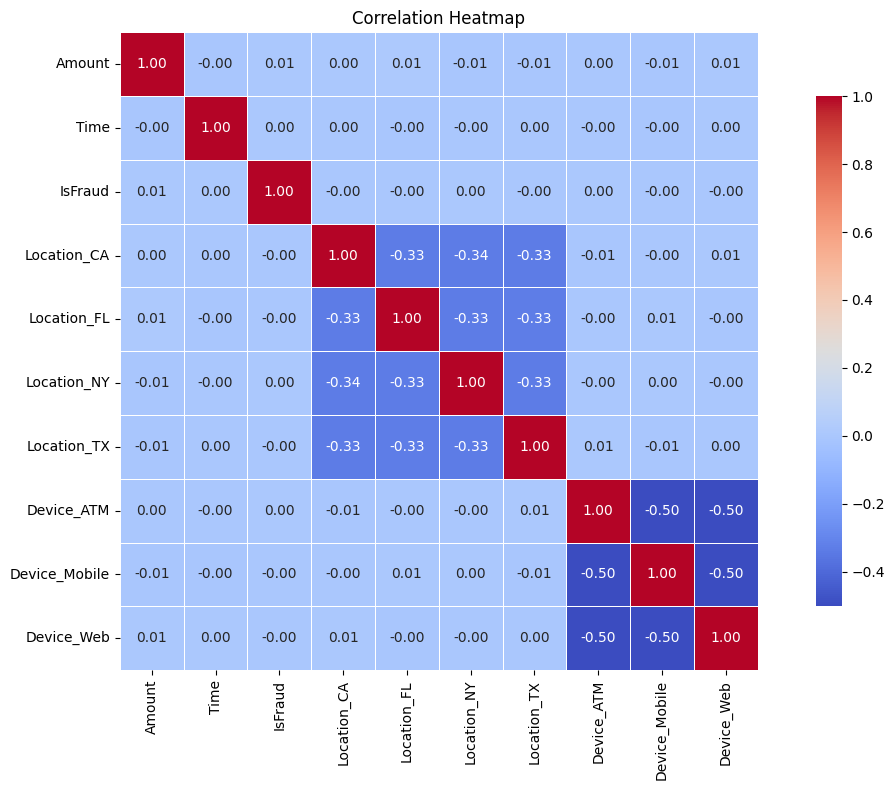

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, 
            annot=True,        # Show values in boxes
            fmt=".2f",         # Format for numbers
            cmap="coolwarm",   # Color palette
            square=True,       # Square cells
            linewidths=0.5,    # Grid lines
            cbar_kws={"shrink": 0.8})  # Colorbar size

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## <a id='toc1_4_'></a>[Step-03 Splitting dataset into Training and Testing](#toc0_)

In [ ]:
X = df_encoded.drop(columns=['IsFraud'], axis = 1)
y = df_encoded['IsFraud']

X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state= 42)

## <a id='toc1_5_'></a>[Step-04 Apply SMOTE - Synthetic Minority Over-sampling Technique](#toc0_)

- It’s used to balance imbalanced datasets by creating new synthetic examples of the minority class.
- The model sees too few frauds and may just predict “Not Fraud” all the time.
💥 This is where SMOTE helps!

| IsFraud | Count  |
| ------- | ------ |
| 0       | 49,031 |
| 1       | 969    |


In [14]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_bal.value_counts())

Before SMOTE:
 IsFraud
0    39168
1      832
Name: count, dtype: int64
After SMOTE:
 IsFraud
0    39168
1    39168
Name: count, dtype: int64


## <a id='toc1_6_'></a>[Step-05  Model Selection](#toc0_)

#### <a id='toc1_6_1_1_'></a>[(i) Apply Random Forest](#toc0_)

In [ ]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

#### <a id='toc1_6_1_2_'></a>[(ii) Apply Gradient Boosting](#toc0_)

In [ ]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_bal, y_train_bal)

GradientBoostingClassifier(random_state=42)

## <a id='toc1_7_'></a>[Step-06 Model Prediction](#toc0_)

In [ ]:
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

## <a id='toc1_8_'></a>[Step-07 Model Evaluation](#toc0_)

#### <a id='toc1_8_1_1_'></a>[Evaluation of Random Forest Classifier](#toc0_)

In [ ]:
Accuracy = accuracy_score(y_test, y_pred_rf)
ra_score = roc_auc_score(y_test , y_pred_rf)
cf = confusion_matrix(y_test , y_pred_rf)
cr = classification_report(y_test, y_pred_rf)

print(f"Acccuracy of Random Forest Model: {Accuracy:.2f}")
print(f"ROC AUC Score: {ra_score:.2f}")
print("Confusion Matrix:\n", cf)
print("Classification Report:\n", cr)


Acccuracy of Random Forest Model: 0.97
ROC AUC Score: 0.50
Confusion Matrix:
 [[9736   81]
 [ 182    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      9817
           1       0.01      0.01      0.01       183

    accuracy                           0.97     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.96      0.97      0.97     10000



#### <a id='toc1_8_1_2_'></a>[Evaluation of Gradient Boosting Classifier](#toc0_)

In [ ]:
Accuracy = accuracy_score(y_test, y_pred_gb)
ra_score = roc_auc_score(y_test , y_pred_gb)
cf = confusion_matrix(y_test , y_pred_gb)
cr = classification_report(y_test, y_pred_gb)

print(f"Acccuracy of Gradient Boosting Model: {Accuracy:.2f}")
print(f"ROC AUC Score: {ra_score:.2f}")
print("Confusion Matrix:\n", cf)
print("Classification Report:\n", cr)

Acccuracy of Gradient Boosting Model: 0.98
ROC AUC Score: 0.50
Confusion Matrix:
 [[9817    0]
 [ 183    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9817
           1       0.00      0.00      0.00       183

    accuracy                           0.98     10000
   macro avg       0.49      0.50      0.50     10000
weighted avg       0.96      0.98      0.97     10000



c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sobia Alamgir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## <a id='toc1_9_'></a>[Step-08 Save and Load Model](#toc0_)

In [27]:
model_rf = joblib.dump(model_rf, 'random_forest_model.pkl')
model_gb = joblib.dump(model_gb, 'gradient_boosting_model.pkl')

In [ ]:
model_rf = joblib.load('random_forest_model.pkl')
model_gb = joblib.load('gradient_boosting_model.pkl')

## <a id='toc1_10_'></a>[Step-09 Creare dataframe with predicted values](#toc0_)

In [29]:
y_pred_rf = y_pred_gb[:50000]

In [ ]:
dataframe_rf = pd.DataFrame({"Actual_Fraud": y_test , "Predicted_Fraud": y_pred_rf})
dataframe_rf

,Actual_Fraud,Predicted_Fraud
33553,0,0
9427,0,0
199,0,0
12447,0,0
39489,0,0
...,...,...
28567,0,0
25079,0,0
18707,0,0
15200,0,0


## <a id='toc1_11_'></a>[Step-10 Data Visualization](#toc0_)

* **Let's See how imbalanced the data is**

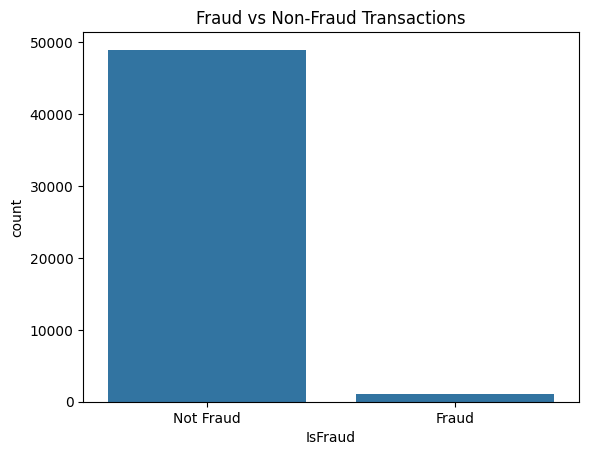

In [33]:
sns.countplot(x='IsFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

* **We can also check with pie chart**

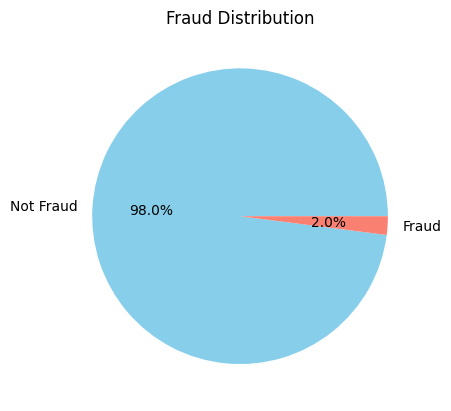

In [34]:
df['IsFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Fraud', 'Fraud'], colors=['skyblue','salmon'])
plt.title("Fraud Distribution")
plt.ylabel("")
plt.show()

* **Let's see if frauds have unusually high or low amounts**

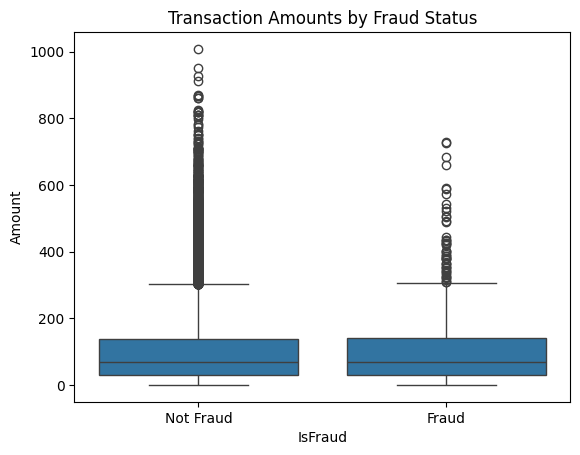

In [35]:
sns.boxplot(x='IsFraud', y='Amount', data=df)
plt.title("Transaction Amounts by Fraud Status")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

* **Identify if frauds happen at certain times**

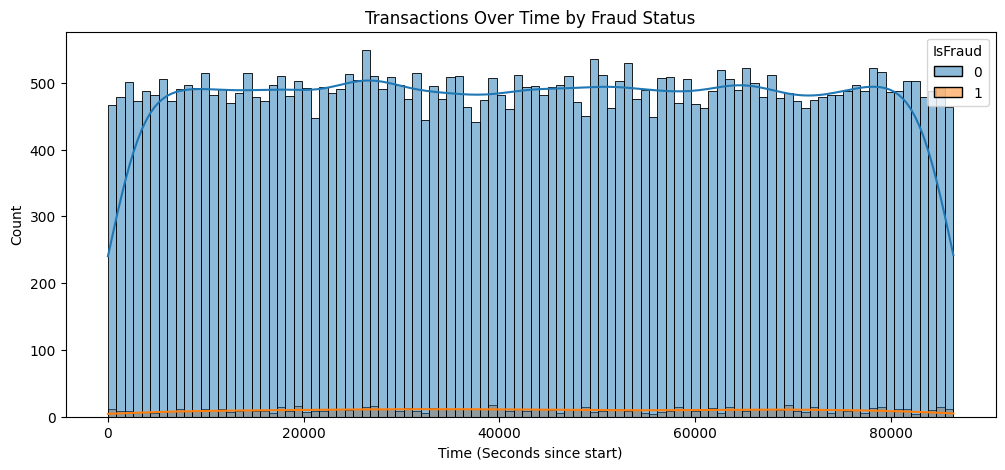

In [37]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Time', hue='IsFraud', bins=100, kde=True)
plt.title("Transactions Over Time by Fraud Status")
plt.xlabel("Time (Seconds since start)")
plt.show()

* **Explore if fraud is concentrated in some locations**

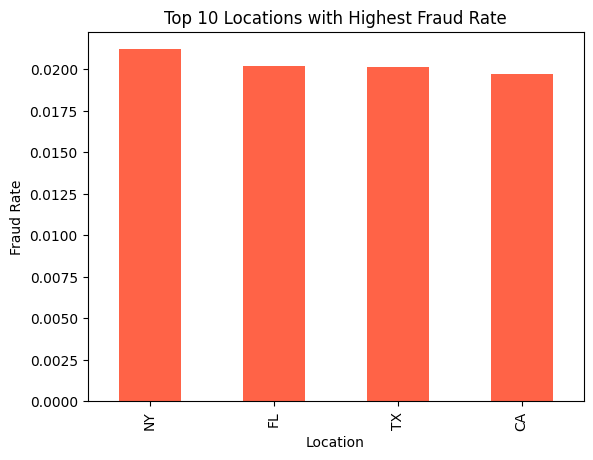

In [38]:
fraud_by_location = df.groupby('Location')['IsFraud'].mean().sort_values(ascending=False).head(10)
fraud_by_location.plot(kind='bar', color='tomato')
plt.title("Top 10 Locations with Highest Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()

* **Check if some devices are riskier**

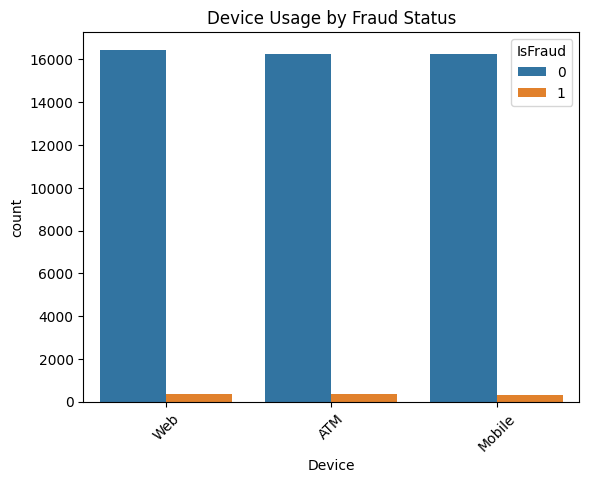

In [39]:
sns.countplot(x='Device', hue='IsFraud', data=df, order=df['Device'].value_counts().index)
plt.title("Device Usage by Fraud Status")
plt.xticks(rotation=45)
plt.show()

* **We can also check using bar chart**

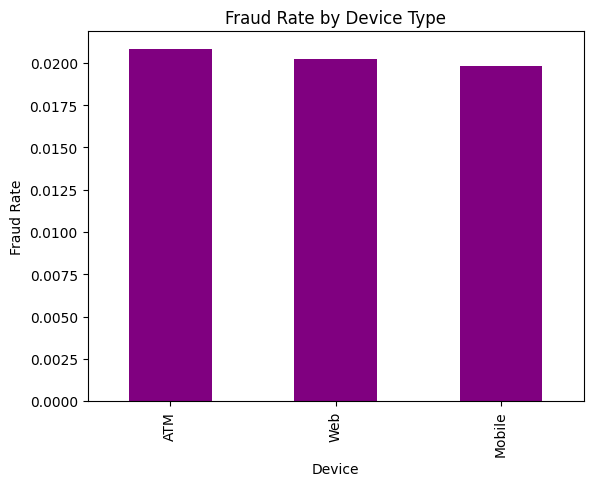

In [40]:
fraud_by_device = df.groupby('Device')['IsFraud'].mean().sort_values(ascending=False)
fraud_by_device.plot(kind='bar', color='purple')
plt.title("Fraud Rate by Device Type")
plt.ylabel("Fraud Rate")
plt.show()

* **Pairplot for Feature Relationships**

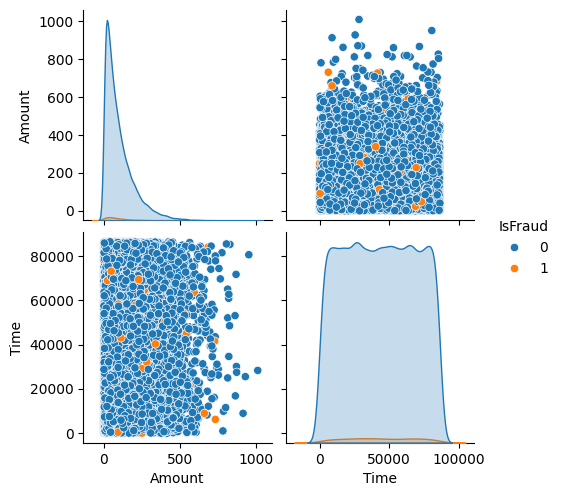

In [41]:
sns.pairplot(df[['Amount', 'Time', 'IsFraud']], hue='IsFraud', diag_kind='kde')
plt.show()

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thankyou</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>